<a href="https://colab.research.google.com/github/AndrewPolyak/PyTorch-Self-Learning/blob/main/exercises/01_pytorch_workflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

This is an example of a PyTorch end-to-end workflow based on Module 1 of Daniel Bourke's course found here: https://www.learnpytorch.io/01_pytorch_workflow/.

The basis for the code comes from my experience with following along the course. Everything has been successfully implemented through plain knowledge acquired from the course.

*By Andrew Polyak*

In [265]:
import torch
from torch import nn

import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

## Create Data

Load basic regression model data

x = features,
y = labels

In [266]:
# Create X and y

X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim=1)

# Known parameters (for sake of example; parameters not known in typical case)
bias = 0.3
weight = 0.7

# Linear regression formula used to create truth labels for known parameters
y = bias * weight + X
y

tensor([[0.2100],
        [0.2300],
        [0.2500],
        [0.2700],
        [0.2900],
        [0.3100],
        [0.3300],
        [0.3500],
        [0.3700],
        [0.3900],
        [0.4100],
        [0.4300],
        [0.4500],
        [0.4700],
        [0.4900],
        [0.5100],
        [0.5300],
        [0.5500],
        [0.5700],
        [0.5900],
        [0.6100],
        [0.6300],
        [0.6500],
        [0.6700],
        [0.6900],
        [0.7100],
        [0.7300],
        [0.7500],
        [0.7700],
        [0.7900],
        [0.8100],
        [0.8300],
        [0.8500],
        [0.8700],
        [0.8900],
        [0.9100],
        [0.9300],
        [0.9500],
        [0.9700],
        [0.9900],
        [1.0100],
        [1.0300],
        [1.0500],
        [1.0700],
        [1.0900],
        [1.1100],
        [1.1300],
        [1.1500],
        [1.1700],
        [1.1900]])

In [267]:
# Create train and test sets

train_split = int(0.8 * len(X))
print(f"{train_split} training items and {len(X) - train_split} testing items\n")

# Create the training features and labels (40 items)
X_train, y_train = X[:train_split], y[:train_split]

# Create the testing features and labels (30 items)
X_test, y_test = X[train_split:], y[train_split:]

print(f"Training values: {X_train}\nTraining labels: {y_train}\n")
print(f"Testing values: {X_test}\nTesting labels: {y_test}")

40 training items and 10 testing items

Training values: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])
Training labels: tensor([[0.2100],
        [0.2300],
        [0.2500],
        [0.2700],
        [0.2900],
        [0.3100],
        [0.3300],
        [0.3500],
        [0.3700],
        [0.3900],
        [0.4100],
       

## Create Model

Create basic NN model that leverages Linear activation function

In [268]:
# Define neural network

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    return self.layer(x)

In [269]:
# Instantiate model and confirm parameters

torch.manual_seed(42)

model = LinearRegressionModel()
print(f"Model: {model}\nParameters: {model.state_dict()}")

Model: LinearRegressionModel(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)
Parameters: OrderedDict([('layer.weight', tensor([[0.7645]])), ('layer.bias', tensor([0.8300]))])


## Create Training and Evaluation Loop

Define optimizer, loss function, and training / evaluation loop

In [270]:
# Leverage Stochastic Gradient Descent for optimization
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.02)

# Leverage Mean Absolute Error for loss function
loss_fn = nn.L1Loss()

epochs = 200

epoch_list = []
loss_list = []
test_loss_list = []

for epoch in range(epochs):

  # Set model to train mode
  model.train()

  # Get the prediction --> Use the training features defined earlier (first 80%)
  y_pred = model(X_train)

  # Get the loss --> Compare the predicted labels against the true labels
  loss = loss_fn(y_pred, y_train)

  # Zero the gradients
  optimizer.zero_grad()

  # Perform backpropagation
  loss.backward()

  # Perform gradient descent
  optimizer.step()

  # Set model to evaluation mode
  model.eval()

  # Get the prediction --> Use the testing features defined earlier (second 80%)
  y_pred_test = model(X_test)

  # Get the loss --> Compare the predicted labels against the true labels
  test_loss = loss_fn(y_pred_test, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

    epoch_list.append(epoch)
    loss_list.append(loss)
    test_loss_list.append(test_loss)

Epoch: 0 | Loss: 0.5281779170036316 | Test Loss: 0.3835051953792572
Epoch: 10 | Loss: 0.29775822162628174 | Test Loss: 0.11408556997776031
Epoch: 20 | Loss: 0.09950893372297287 | Test Loss: 0.11925448477268219
Epoch: 30 | Loss: 0.07624689489603043 | Test Loss: 0.162189319729805
Epoch: 40 | Loss: 0.06879310309886932 | Test Loss: 0.15806186199188232
Epoch: 50 | Loss: 0.06188695505261421 | Test Loss: 0.14289072155952454
Epoch: 60 | Loss: 0.05501287057995796 | Test Loss: 0.12771956622600555
Epoch: 70 | Loss: 0.048155978322029114 | Test Loss: 0.11117460578680038
Epoch: 80 | Loss: 0.04127970710396767 | Test Loss: 0.09462960809469223
Epoch: 90 | Loss: 0.034408967941999435 | Test Loss: 0.07945845276117325
Epoch: 100 | Loss: 0.027550052851438522 | Test Loss: 0.06291349977254868
Epoch: 110 | Loss: 0.02067243680357933 | Test Loss: 0.04636852815747261
Epoch: 120 | Loss: 0.013805058784782887 | Test Loss: 0.031197410076856613
Epoch: 130 | Loss: 0.0069427876733243465 | Test Loss: 0.01465255580842495


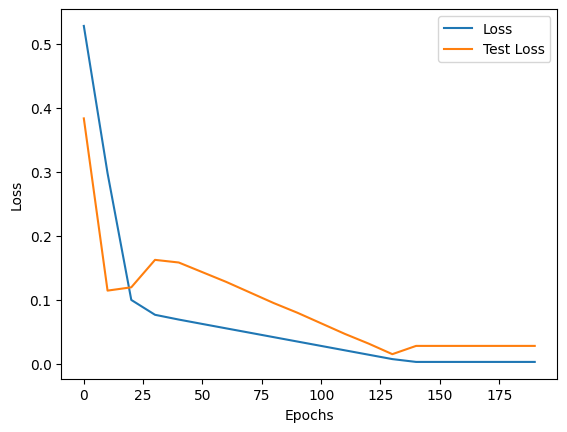

In [271]:
# Plot loss over time (epochs)

plt.figure()
plt.plot(epoch_list, np.array(torch.tensor(loss_list).cpu().numpy()), label="Loss")
plt.plot(epoch_list, np.array(torch.tensor(test_loss_list).cpu().numpy()), label="Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Make Prediction

The red dots should overlap the green

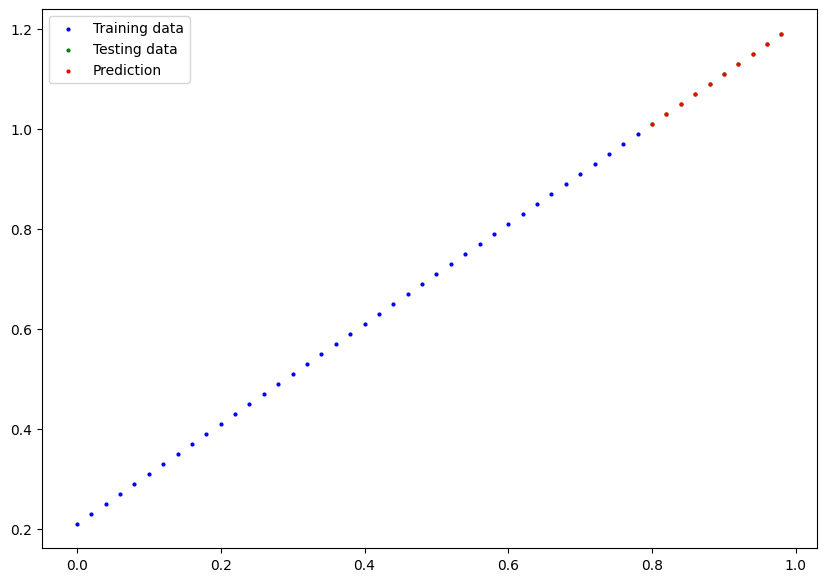

In [272]:
# Make prediction and plot results

with torch.inference_mode():
  prediction = model(X_test)

plt.figure(figsize=(10, 7))

plt.scatter(X_train, y_train, c="b", s=4, label="Training data")

plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")

plt.scatter(X_test, prediction, c="r", s=4, label="Prediction")

plt.legend()

## Save and Load Model

In [273]:
# Define save path

FOLDER = Path('models')
FOLDER.mkdir(parents=True, exist_ok=True)

NAME = 'first_model'

PATH = FOLDER / NAME
PATH

PosixPath('models/first_model')

In [274]:
# Save model parameters

torch.save(model.state_dict(), PATH)

In [275]:
# Load model

loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(PATH))

# True if the same model state has been loaded
model.state_dict() == loaded_model.state_dict()

True